Import required libraries

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #import a function called "train test split" with this function we can easily split our data set into two sets for training and testing 

Defining the LinearRegression class

In [16]:
class LinearRegression(): 

	# Constructor function for store the learning rate and no. of iterations 
	def __init__(self, learning_rate, no_of_itr): 
		self.learning_rate = learning_rate 
		self.no_of_itr = no_of_itr 

	def fit(self, X, Y): 
		self.X = X # Training features array stores ax .X attribute
		self.Y = Y  # Training target values array stores ay .Y attribute
		# m = No. of training examples
		# n = no. of features. 
		self.m, self.n = X.shape	 # Number of rows and columns of X
		# Initiating the weight and bias 
		self.w = np.zeros((self.n, 1)) 
		self.b = 0
		# Implementing the gradient descent. 
		for _ in range(self.no_of_itr): 
			self.gradient_descent() 

	def compute_cost(self): 
		# Implementation of cost function 
		Y_prediction = self.predict(self.X) #f_wb = w*x[i] + b for all 0<i<=m
		return (1/self.m)*np.sum((Y_prediction - self.Y)**2)
			
	def gradient_descent(self): 
		Y_prediction = self.predict(self.X) 

		# Calculating gradients by partial derivatives of cost function
		djdw = (1/self.m)*(self.X.T).dot(Y_prediction-self.Y) 
		djdb = (1/self.m)*np.sum(Y_prediction - self.Y)

		# repeating the gradient descent for learning parameters 
		self.w = self.w - self.learning_rate * djdw 
		self.b = self.b - self.learning_rate * djdb 
	

	def predict(self, X): 
		return X.dot(self.w) + self.b 
		
	def return_weights(self): 
		return self.w, self.b

Importing the data set

In [8]:
df = pd.read_csv('Salaries.csv') 
df.head() 

,YearsExperience,Salary
0,3.3,39425.0
1,3.5,46182.0
2,3.7,37817.0
3,4.2,43590.0
4,4.4,39960.0


In [9]:
df.shape 

(29, 2)

In [10]:
X = df['YearsExperience'].values.reshape(-1, 1) 
y = df['Salary'].values.reshape(-1, 1) 

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # testing data percentage =0.2 =20%

In [12]:
X_train

array([[ 3.3],
       [ 6.2],
       [ 5.2],
       [ 7.1],
       [11.6],
       [10.8],
       [ 4.2],
       [ 7.3],
       [10. ],
       [ 3.5],
       [ 6.2],
       [ 8.2],
       [ 4.4],
       [ 5.4],
       [ 6.1],
       [ 9.2],
       [ 5.9],
       [ 8.1],
       [ 3.7],
       [11.1],
       [ 8.9],
       [ 6.3],
       [11.7]])

In [17]:
model = LinearRegression(learning_rate=0.03, 
						no_of_itr=2000) 
model.fit(X_train, y_train) 

In [18]:
w,b = model.return_weights()
print('Weights for the respective features are : \n'  ,w) 
print('Bias value for the regression is ', b)

Weights for the respective features are : 
 [[9501.17628501]]
Bias value for the regression is  4580.727881897446


In [19]:
Y_predict = model.predict(X_test)
print(y_test)
print(Y_predict)

[[ 56575.]
 [122292.]
 [113745.]
 [ 61057.]
 [ 54392.]
 [ 83191.]]
[[ 53036.72693543]
 [122395.31381598]
 [102442.84361747]
 [ 68238.60899144]
 [ 55887.07982093]
 [ 75839.55001945]]


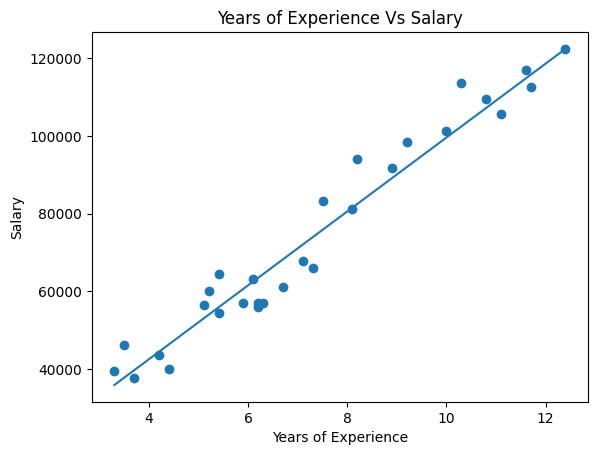

In [20]:
plt.scatter(df['YearsExperience'], df['Salary']) 
plt.xlabel('Years of Experience') 
plt.ylabel('Salary') 
plt.title('Years of Experience Vs Salary') 
w,b = model.return_weights()
X = df['YearsExperience'].values 
plt.plot(X, w[0][0] * X + b) 
plt.show() 